In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

In [2]:
CLIENT_ID = 'fea517ed3160484ab33f2b534c8d4fd2'
CLIENT_SECRET = '215335e07e8f4ea0b75885a163ef2697'
REDIRECT_URI = 'http://127.0.0.1:8888/callback'
SCOPE = 'user-library-read user-read-recently-played'

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE
))

# Data Extraction

In [4]:
# Obtaining my liked songs

tracks = []
limit = 50
offset = 0

while True:
    results = sp.current_user_saved_tracks(limit = limit, offset = offset)
    items = results['items']

    if not items:
        break

    for item in items:
        track = item['track']
        album = track['album']
        artist_id = track['artists'][0]['id']
        artist_info = sp.artist(artist_id)
        genres = artist_info['genres']

        # If there is no gender for an artist, fill it with Unknown
        if not genres:
            genres = 'Unknown'
            
        tracks.append({
            'id': track['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'genres': genres,
            'popularity': track['popularity'],
            'duration': track['duration_ms'],
            'explicit': track['explicit'],
            'added_at': item['added_at'],
            'released': album['release_date'],

        })

    offset += limit


df_likes = pd.DataFrame(tracks)
df_likes.head()

,id,name,artist,album,genres,popularity,duration,explicit,added_at,released
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,191825,False,2025-09-20T20:25:38Z,2023-09-21
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,164041,True,2025-09-20T20:22:56Z,2022-11-18
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,255581,False,2025-09-20T20:03:24Z,2024-04-25
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,165107,False,2025-09-20T20:02:24Z,2024-10-04
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,304200,False,2025-09-20T19:40:33Z,2008-02-26


# Data Cleaning

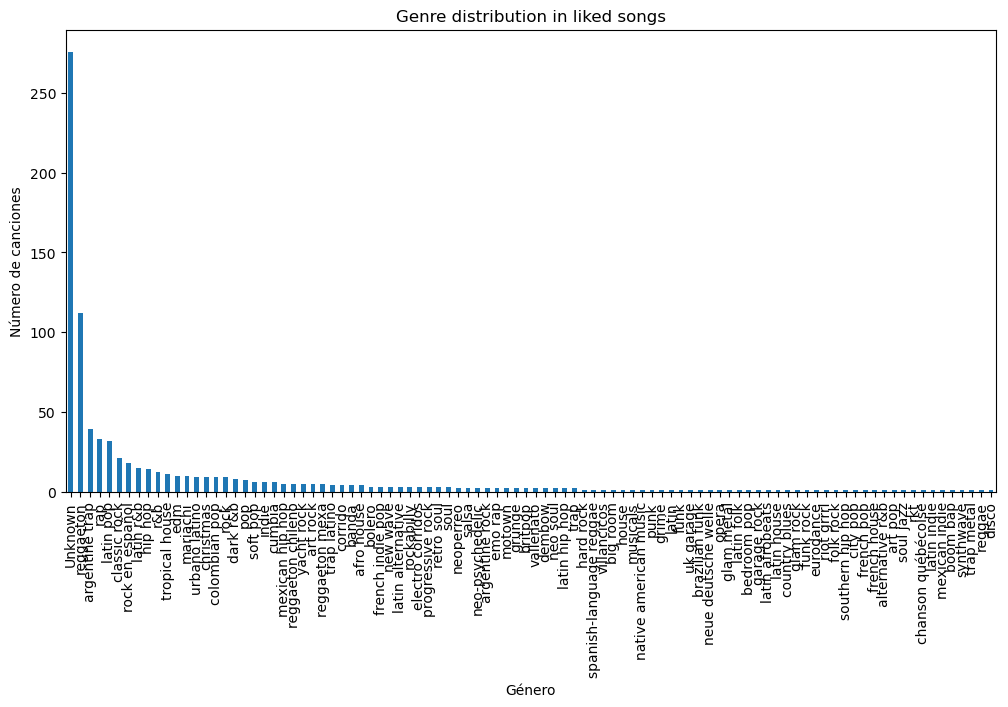

In [5]:
# Cleaning genres for more general classification

import matplotlib.pyplot as plt

# Obtaining main gender of each song for easier cleaning
df_likes['main_genre'] = df_likes['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

# Ocurrencies by gender z
genre_count = df_likes['main_genre'].value_counts()

#Histogram
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre distribution in liked songs')
plt.xlabel('Género')
plt.ylabel('Número de canciones')
plt.xticks(rotation=90)
plt.show()

In [6]:
for genre, count in genre_count.items():
    print(f"{genre}: {count}")

Unknown: 276
reggaeton: 112
argentine trap: 39
rap: 33
latin pop: 32
classic rock: 21
rock en español: 18
latin r&b: 15
hip hop: 14
r&b: 12
tropical house: 11
edm: 10
mariachi: 10
urbano latino: 9
christmas: 9
colombian pop: 9
rock: 9
dark r&b: 8
pop: 7
soft pop: 6
indie: 6
cumbia: 6
mexican hip hop: 5
reggaeton chileno: 5
yacht rock: 5
art rock: 5
reggaeton mexa: 5
trap latino: 4
corrido: 4
banda: 4
afro house: 4
bolero: 3
french indie pop: 3
new wave: 3
latin alternative: 3
rockabilly: 3
electro corridos: 3
progressive rock: 3
retro soul: 3
soul: 3
neoperreo: 2
salsa: 2
neo-psychedelic: 2
argentine rock: 2
emo rap: 2
motown: 2
grunge: 2
britpop: 2
vallenato: 2
dembow: 2
neo soul: 2
latin hip hop: 2
trap: 2
hard rock: 1
spanish-language reggae: 1
villancicos: 1
big room: 1
house: 1
musicals: 1
native american music: 1
punk: 1
grime: 1
latin: 1
funk: 1
uk garage: 1
brazilian funk: 1
neue deutsche welle: 1
opera: 1
glam metal: 1
latin folk: 1
bedroom pop: 1
garage rock: 1
latin afrobeat

In [7]:
# Cleaning Unknown genre
unknown_genres = df_likes[df_likes['main_genre'] == "Unknown"]

print(unknown_genres['artist'].unique())

['Pharrell Williams' 'Mori' 'AntoneNow' 'Twenty One Pilots' 'W Sound'
 'The Weeknd' 'Don Toliver' 'Daniel Caesar' 'Empire Of The Sun' 'nulled.'
 'Jacob Banks' 'The Heavy' 'Cordae' 'Tyler, The Creator' 'Kali Uchis'
 'Sade' 'Dominic Fike' 'Bruno Mars' 'Loverboy' 'Finger Eleven' 'YUNGBLUD'
 'mgk' 'Metro Boomin' 'Nelly Furtado' 'Imagine Dragons' 'Lenny Kravitz'
 'B. Nasty' 'Paperboy Fabe' 'Mishaal Tamer'
 'James Brown & The Famous Flames' "K'NAAN" 'Planet Giza' 'WizTheMc'
 'C. Tangana' 'Hotel Ugly' 'Leon Thomas' 'Mac Miller' 'Steve Lacy'
 'Ismatricule' 'BODHI' 'Michael Jackson' 'Quevedo' 'Keaton Simons'
 'Artemas' 'Tory Lanez' '6LACK' 'Leonel García' 'Deyco' 'Alvaro Diaz'
 'Sevdaliza' 'WWE' 'Natasha Bedingfield' 'Kid Cudi' 'James Blake'
 'Frank Ocean' 'Jack Harlow' 'Childish Gambino' 'Brady' 'Free Nationals'
 'Foster The People' 'SAG' 'The Change' 'Carlos Corté$'
 'The Neighbourhood' 'The Technicolors' 'Pretty Boy Aaron' 'ODIE'
 'Aaron May' 'ame' 'Motaki' 'STRANGEHUMAN' 'RÜFÜS DU SOL' 'Ada

In [8]:
# Mapping genres for these artists

artist_genre_map = {
    "Pharrell Williams": "R&B",
    "Mori": "Latin",
    "AntoneNow": "Hip Hop",
    "Twenty One Pilots": "Alternative/Indie",
    "W Sound": "Electronic",
    "The Weeknd": "R&B",
    "Don Toliver": "Hip Hop",
    "Daniel Caesar": "R&B",
    "Empire Of The Sun": "Electronic",
    "nulled.": "Other",
    "Jacob Banks": "Soul",
    "The Heavy": "Rock",
    "Cordae": "Hip Hop",
    "Tyler, The Creator": "Hip Hop",
    "Kali Uchis": "R&B",
    "Sade": "R&B",
    "Dominic Fike": "Alternative/Indie",
    "Bruno Mars": "Pop",
    "Loverboy": "Rock",
    "Finger Eleven": "Rock",
    "YUNGBLUD": "Alternative/Indie",
    "mgk": "Hip Hop",
    "Metro Boomin": "Hip Hop",
    "Nelly Furtado": "Pop",
    "Imagine Dragons": "Alternative/Indie",
    "Lenny Kravitz": "Rock",
    "B. Nasty": "Hip Hop",
    "Paperboy Fabe": "Hip Hop",
    "Mishaal Tamer": "Pop",
    "James Brown & The Famous Flames": "Soul",
    "K'NAAN": "Hip Hop",
    "Planet Giza": "Hip Hop",
    "WizTheMc": "Hip Hop",
    "C. Tangana": "Latin",
    "Hotel Ugly": "Pop",
    "Leon Thomas": "Jazz",
    "Mac Miller": "Hip Hop",
    "Steve Lacy": "R&B",
    "Ismatricule": "Other",
    "BODHI": "Electronic",
    "Michael Jackson": "Pop",
    "Quevedo": "Latin",
    "Keaton Simons": "Pop",
    "Artemas": "Pop",
    "Tory Lanez": "R&B",
    "6LACK": "R&B",
    "Leonel García": "Latin",
    "Deyco": "Latin",
    "Alvaro Diaz": "Latin",
    "Sevdaliza": "Alternative/Indie",
    "WWE": "Other",
    "Natasha Bedingfield": "Pop",
    "Kid Cudi": "Hip Hop",
    "James Blake": "Electronic",
    "Frank Ocean": "R&B",
    "Jack Harlow": "Hip Hop",
    "Childish Gambino": "R&B",
    "Brady": "Other",
    "Free Nationals": "R&B",
    "Foster The People": "Alternative/Indie",
    "SAG": "Other",
    "The Change": "Rock",
    "Carlos Corté$": "Hip Hop",
    "The Neighbourhood": "Alternative/Indie",
    "The Technicolors": "Rock",
    "Pretty Boy Aaron": "Hip Hop",
    "ODIE": "R&B",
    "Aaron May": "Pop",
    "ame": "Electronic",
    "Motaki": "Pop",
    "STRANGEHUMAN": "Pop",
    "RÜFÜS DU SOL": "Electronic",
    "Adam Jensen": "Other",
    "DJ Fronteo": "Electronic",
    "Lao Ra": "Latin",
    "Zayde Wølf": "Rock",
    "Gesaffelstein": "Electronic",
    "Paulo": "Latin",
    "Sonic Piñotas Music": "Latin",
    "Billie Eilish": "Pop",
    "Kodi Lee": "Pop",
    "El Burger": "Latin",
    "Feloman": "Hip Hop",
    "The Score": "Alternative/Indie",
    "Feder": "Electronic",
    "Mau Moctezuma": "Latin",
    "Micro TDH": "Latin",
    "MAX": "Pop",
    "5 Seconds of Summer": "Pop",
    "Michl": "Pop",
    "blackbear": "R&B",
    "Alina Baraz": "R&B",
    "B.J. Thomas": "Pop",
    "Alan Walker": "Electronic",
    "Post Malone": "Hip Hop",
    "Swae Lee": "Hip Hop",
    "Justin Bieber": "Pop",
    "The Hollies": "Rock",
    "Khalid": "R&B",
    "Jack Stauber": "Alternative/Indie",
    "Black Coast": "Electronic",
    "Janice": "Pop",
    "Black Eyed Peas": "Hip Hop",
    "Sia": "Pop",
    "Tones And I": "Pop",
    "Freya Ridings": "Pop",
    "Chava Salazar": "Latin",
    "Alan M.": "Other",
    "Jay Oc": "Hip Hop",
    "Lucifer": "Rock",
    "Javier Rojas Henríquez": "Latin",
    "Solmate": "R&B",
    "Mr Cashier": "Hip Hop",
    "Khenry": "Hip Hop",
    "French Montana": "Hip Hop",
    "Lil Nas X": "Hip Hop",
    "Gerard Way": "Rock",
    "Woodkid": "Alternative/Indie",
    "Frankie Valli": "Pop",
    "Oh The Larceny": "Rock",
    "Jonas Brothers": "Pop",
    "Aaron Smith": "Pop",
    "LMFAO": "Electronic",
    "Survivor": "Rock",
    "Lauv": "Pop",
    "Whethan": "Electronic",
    "SAINt JHN": "Hip Hop",
    "Aminé": "Hip Hop",
    "Whitney Houston": "Pop",
    "LP": "Pop",
    "Blackway": "Hip Hop",
    "The Police": "Rock",
    "Gnarls Barkley": "R&B",
    "KURT": "Rock",
    "DJ Snake": "Electronic",
    "Dvicio": "Pop",
    "Angeles": "Latin",
    "Matisse": "Latin",
    "Huey Lewis & The News": "Rock",
    "benny blanco": "Pop",
    "Dynoro": "Electronic",
    "Clean Bandit": "Electronic",
    "Capital Cities": "Pop",
    "Cardi B": "Hip Hop"
}

# Replacing lines with Unknown genre
df_likes.loc[df_likes['main_genre'] == "Unknown", 'main_genre'] = \
    df_likes.loc[df_likes['main_genre'] == "Unknown", 'artist'].map(artist_genre_map)

In [9]:
# Making sure we have no more Unknown genres
unknown_count = df_likes[df_likes['main_genre'] == "Unknown"].shape[0]

print(f"Songs with Unknown genre: {unknown_count}")

Songs with Unknown genre: 0


In [10]:
# Grouping specific genres into more generals (made in this way to give priority)

def genre_mapping(s):
    s_lower = s.lower()
    if "reggaeton" in s_lower:
        return "Reggaeton"
    elif "trap" in s_lower:
        return "Trap"
    elif "hip hop" in s_lower or "rap" in s_lower:
        return "Hip Hop"
    elif "r&b" in s_lower:
        return "R&B"
    elif "latin" in s_lower or "cumbia" in s_lower or "mariachi" in s_lower:
        return "Latin"
    elif "pop" in s_lower:
        return "Pop"
    elif "rock" in s_lower:
        return "Rock"
    elif "alternative" in s_lower or "indie" in s_lower:
        return "Alternative/Indie"
    elif "electronic" in s_lower or "edm" in s_lower or "house" in s_lower:
        return "Electronic"
    elif "soul" in s_lower:
        return "Soul"
    else:
        return "Other"

df_likes['main_genre'] = df_likes['main_genre'].apply(genre_mapping)

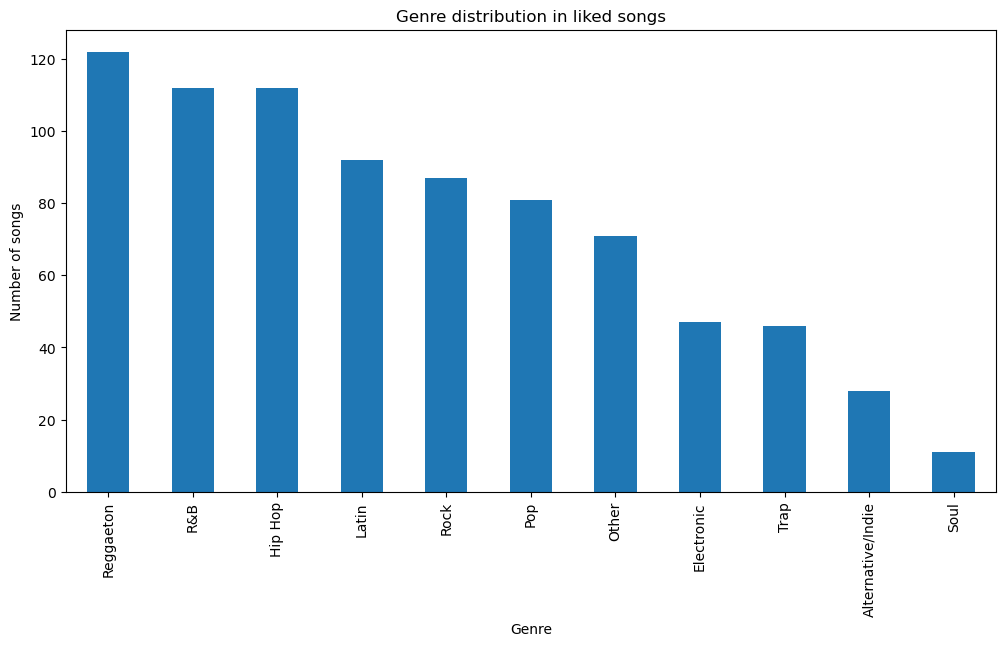

In [11]:
# Final genre distribution

genre_count = df_likes['main_genre'].value_counts()

#Histogram
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre distribution in liked songs')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.xticks(rotation=90)
plt.show()

In [12]:
df_likes.head()

,id,name,artist,album,genres,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,191825,False,2025-09-20T20:25:38Z,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,164041,True,2025-09-20T20:22:56Z,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,255581,False,2025-09-20T20:03:24Z,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,165107,False,2025-09-20T20:02:24Z,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,304200,False,2025-09-20T19:40:33Z,2008-02-26,Other


In [51]:
# Cleaning cases where released date is not complete
def parse_release(date):
    try:
        return pd.to_datetime(date)
    except:
        if len(str(date)) == 4:  # caso solo año
            return pd.to_datetime(f"{date}-01-01")
        return pd.NaT

df_likes['released'] = df_likes['released'].apply(parse_release)

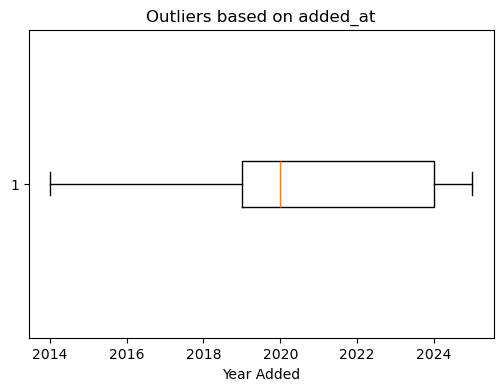

In [59]:
# Detect outliers in added_at column

years_added = df_likes['added_at'].dt.year

plt.figure(figsize=(6,4))
plt.boxplot(years_added, vert=False)
plt.xlabel("Year Added")
plt.title("Outliers based on added_at")
plt.show()

In [61]:
# Obtain songs per year

songs_per_year = df_likes.groupby(df_likes['added_at'].dt.year).size()

print(songs_per_year)

added_at
2014      1
2018    178
2019    112
2020    136
2022     11
2023    141
2024     94
2025    136
dtype: int64


In [64]:
# Delete song from 2014 for better analysis
df_likes = df_likes[df_likes['added_at'].dt.year != 2014]

print(df_likes['added_at'].dt.year.value_counts().sort_index())


added_at
2018    178
2019    112
2020    136
2022     11
2023    141
2024     94
2025    136
Name: count, dtype: int64


# Data Transformation

In [ ]:
# Transforming duration ms -> min
df_likes['duration'] = (df_likes['duration'] / (1000 * 60)).round(1)

df_likes.head()

,id,name,artist,album,genres,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,3.2,False,2025-09-20T20:25:38Z,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,2.7,True,2025-09-20T20:22:56Z,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,4.3,False,2025-09-20T20:03:24Z,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,2.8,False,2025-09-20T20:02:24Z,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,5.1,False,2025-09-20T19:40:33Z,2008-02-26,Other


In [17]:
# Convert added_at to datetime
df_likes["added_at"] = pd.to_datetime(df_likes["added_at"])

# Use format YYYY-MM-DD
df_likes['added_at'] = df_likes['added_at'].dt.date

df_likes.head()

/var/folders/r0/7_y3895s2_ng2cm7ch_fjd0r0000gn/T/ipykernel_2495/60659576.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_likes["added_at"] = pd.to_datetime(df_likes["added_at"])


,id,name,artist,album,genres,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,"[spanish-language reggae, reggae]",66,3.2,False,2025-09-20,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,Unknown,60,2.7,True,2025-09-20,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,Unknown,40,4.3,False,2025-09-20,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,Unknown,48,2.8,False,2025-09-20,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,"[salsa, merengue, son cubano]",72,5.1,False,2025-09-20,2008-02-26,Other


In [18]:
# Delete genres column

df_likes = df_likes.drop(columns=["genres"])

df_likes.head()

,id,name,artist,album,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,66,3.2,False,2025-09-20,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,60,2.7,True,2025-09-20,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,40,4.3,False,2025-09-20,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,48,2.8,False,2025-09-20,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,72,5.1,False,2025-09-20,2008-02-26,Other


In [19]:
# Transforming explicit column to a categorical value

df_likes["explicit"] = df_likes["explicit"].map({True: "Explicit", False: "Clean"})

df_likes.head()

,id,name,artist,album,popularity,duration,explicit,added_at,released,main_genre
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,66,3.2,Clean,2025-09-20,2023-09-21,Other
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,60,2.7,Explicit,2025-09-20,2022-11-18,R&B
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,40,4.3,Clean,2025-09-20,2024-04-25,Latin
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,48,2.8,Clean,2025-09-20,2024-10-04,Hip Hop
4,2n1MTLCis6qPSDKdr5XSDI,Oh Qué Será?,Willie Colón,Greatest Hits,72,5.1,Clean,2025-09-20,2008-02-26,Other


# Analysis

In [65]:
# Mean of my songs' duartion 

mean_duration = (df_likes['duration'].mean()).round(1)
print("Mean of my songs:", mean_duration, "minutes")

Mean of my songs: 3.7 minutes


**Insights:** The average duration of my songs is 3.7 minutes, which suggests that most of the tracks I listen to are of standard length, typical for mainstream music. This indicates a preference for songs that are long enough to develop melodies and lyrics, but not too long to risk losing attention.

/var/folders/r0/7_y3895s2_ng2cm7ch_fjd0r0000gn/T/ipykernel_2495/619078936.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=top_artists.values, y=top_artists.index, palette=sns.light_palette("navy", n_colors=len(top_artists), reverse=True), hue= top_artists)


<Axes: ylabel='artist'>

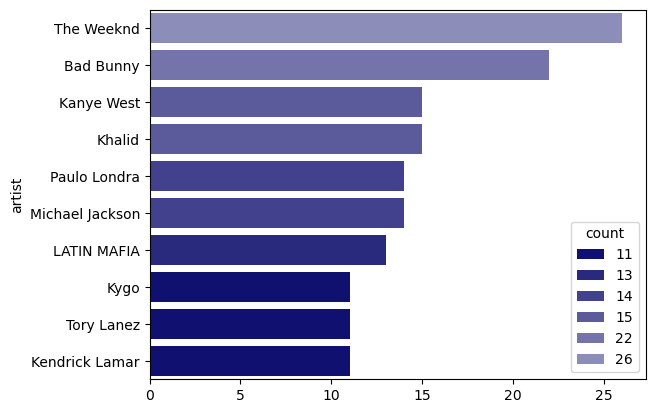

In [66]:
import seaborn as sns

# Top 10 artists

top_artists = df_likes['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette=sns.light_palette("navy", n_colors=len(top_artists), reverse=True), hue= top_artists)

<Axes: ylabel='album'>

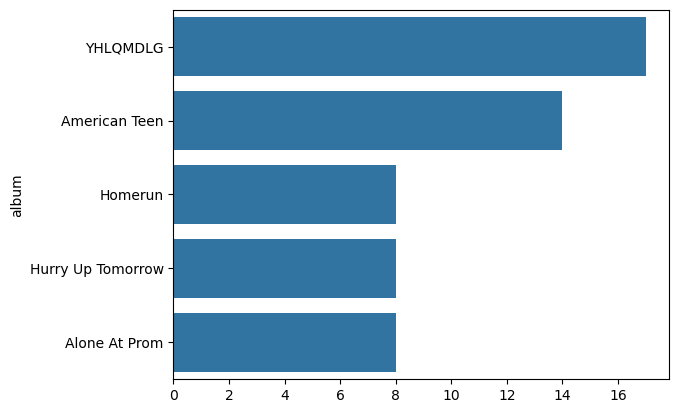

In [67]:
# Top 5 albums

top_albums = df_likes['album'].value_counts().head(5)
sns.barplot(x=top_albums.values, y=top_albums.index)

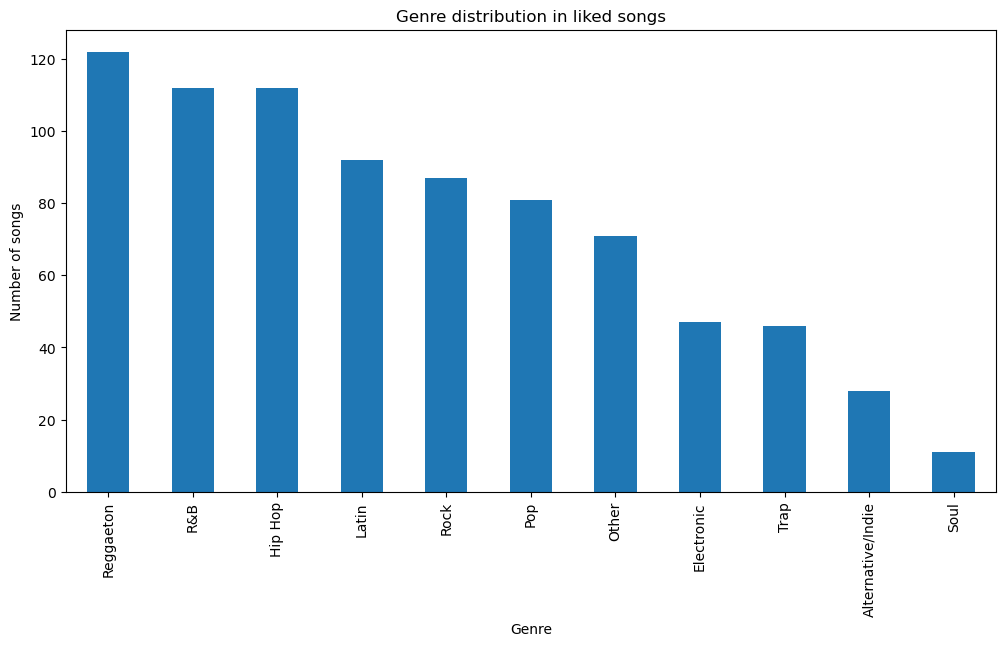

In [68]:
# My songs in genres

plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre distribution in liked songs')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Mean popularity of my songs

mean_popularity = (df_likes['popularity'].mean()).round(1)
print("Mean popularity of my songs:", mean_popularity)

Mean popularity of my songs: 54.0


**Insights:** Based on the average popularity of my songs, I am someone who is not very much affected by trends. I like to discover things on my own and are a bit more attrated to "underground" songs, rather than just hits.

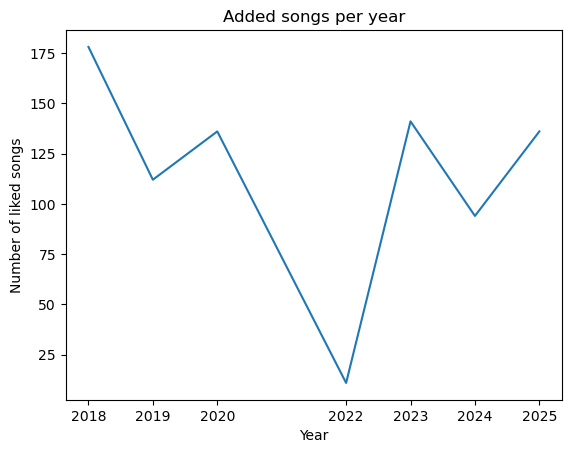

In [70]:
# Aggregated songs per year

df_likes['added_at'] = pd.to_datetime(df_likes['added_at'])
songs_per_year = df_likes.groupby(df_likes['added_at'].dt.year).size()

# Graph
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of liked songs")
plt.title("Added songs per year")
plt.xticks(songs_per_year.index)
plt.show()

**Insights:** My Spotify usage began in 2018, the year in which I added the most songs. In the following two years, the number of liked songs decreased compared to the first year, but the overall pattern remained similar. Surprisingly, during 2021 my Spotify usage was non-existent, which is particularly interesting since it was the year of the full COVID-19 lockdown. Perhaps I stopped using it because I barely left my home during this time, so there was no need to download songs for offline listening.

According to the chart, I started using Spotify again in 2022. Since then, I have been adding a consistent number of songs each year. We are currently in September 2025, so this year might become another significant year for my liked songs playlist.

In [71]:
# Obtaing average time between I aggregated songs to my likes an when were they launched (only since 2018) to analyze how much aware i am of new releases

df_likes['added_at'] = pd.to_datetime(df_likes['added_at'])
df_likes['released'] = pd.to_datetime(df_likes['released'])

# Filter since 2018
df_recent = df_likes[df_likes['released'].dt.year >= 2018]

# Creating column to calculate days to add song since its release
df_recent['days_to_add'] = (df_recent['added_at'] - df_recent['released']).dt.days

/var/folders/r0/7_y3895s2_ng2cm7ch_fjd0r0000gn/T/ipykernel_2495/3084241865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['days_to_add'] = (df_recent['added_at'] - df_recent['released']).dt.days


In [72]:
df_recent.head()

,id,name,artist,album,popularity,duration,explicit,added_at,released,main_genre,days_to_add
0,3lfjd8A0DkB84yrvjzkbry,Hora Loca,Rawayana,¿Quién trae las cornetas?,66,3.2,Clean,2025-09-20,2023-09-21,Other,730
1,5unjCay0kUjuej5ebn4nS4,Down In Atlanta,Pharrell Williams,Down In Atlanta,60,2.7,Explicit,2025-09-20,2022-11-18,R&B,1037
2,07DOGcAf5wXvgT2dCfbutE,Mala Mía,Mori,Mala Mía,40,4.3,Clean,2025-09-20,2024-04-25,Latin,513
3,4ab39A1ehnZyegM1D9ca3C,RIDE,AntoneNow,GREY MATTER,48,2.8,Clean,2025-09-20,2024-10-04,Hip Hop,351
5,3RmFPuTTAjSQ2pbEd2j9oA,Loser,Tame Impala,Loser,79,3.7,Explicit,2025-09-19,2025-09-03,Other,16


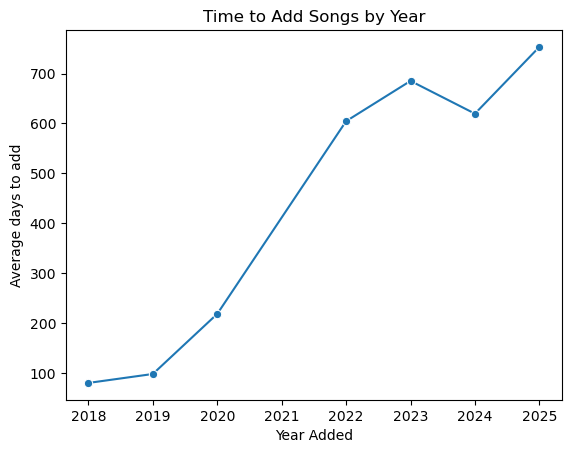

In [73]:
# Avg by year
avg_by_year = df_recent.groupby(df_recent['added_at'].dt.year)['days_to_add'].mean()

# Graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=avg_by_year.index, y=avg_by_year.values, marker='o')
plt.xlabel("Year Added")
plt.ylabel("Average days to add")
plt.title("Time to Add Songs by Year")
plt.show()

**Insights:** Based on this graph, I can tell how my behavior has changed throughout time. During my first years with Spotify, I was more attracted to songs that were new then, I was driven by what was new and everybody was listening to. Then, a complete different patter can be seen since 2022, where practically all songs I added were released almost 2 years before. 

Apparently, now I'm more open for things which are perhaps not the most popular or new. I've found my style and I'm discovering new songs based on what I like. This could also mean that I'm not someone who is really a fan of specific artists, as some people who wait for their new releases and add them as soon as they can. I'm just someone who likes certain genres and discovers them as they explore Spotify.

From a business point of view, this means I am someone who needs a **very direct call to action** to listen to new songs.

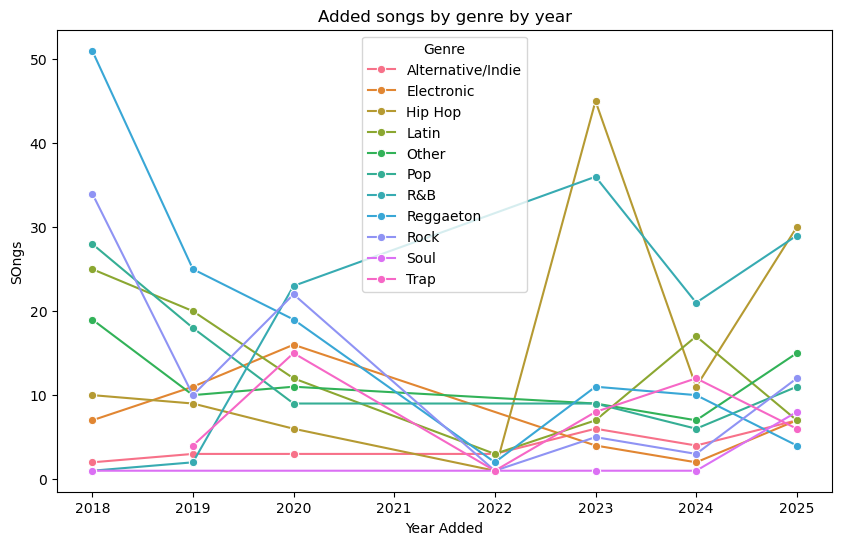

In [74]:
# Added songs by genre by year

genre_by_year = (
    df_likes
    .groupby([df_likes['added_at'].dt.year, 'main_genre'])
    .size()
    .reset_index(name='count')
)

# Graph
plt.figure(figsize=(10,6))
sns.lineplot(
    data=genre_by_year,
    x='added_at',
    y='count',
    hue='main_genre',
    marker='o'
)
plt.xlabel("Year Added")
plt.ylabel("SOngs")
plt.title("Added songs by genre by year")
plt.legend(title="Genre")
plt.show()